In [ ]:
from ast import literal_eval

import numpy as np
import corner

import matplotlib.pyplot as plt
pltparams = {"axes.grid": False,
        "text.usetex" : True,
        "font.family" : "serif",
        "ytick.color" : "black",
        "xtick.color" : "black",
        "axes.labelcolor" : "black",
        "axes.edgecolor" : "black",
        "font.serif" : ["Computer Modern Serif"],
        "xtick.labelsize": 16,
        "ytick.labelsize": 16,
        "axes.labelsize": 16,
        "legend.fontsize": 16,
        "legend.title_fontsize": 16,
        "figure.titlesize": 16}

plt.rcParams.update(pltparams)

default_corner_kwargs = dict(bins=40, 
                        smooth=True, 
                        label_kwargs=dict(fontsize=16),
                        title_kwargs=dict(fontsize=16), 
                        quantiles=[],
                        levels=[0.68, 0.95],
                        plot_density=False, 
                        plot_datapoints=False, 
                        fill_contours=False,
                        max_n_ticks=4, 
                        min_n_ticks=3,
                        save=False,
                        truth_color="darkorange")

import pandas as pd

from fiesta.plot import corner_plot



## Variable systematic uncertainty

Load the data

In [58]:
with open("./data/param_dict.dat", "r") as f:
    params = f.read()
params = literal_eval(params)


posterior_fiesta = np.load("./outdir_fiesta/results_production.npz")

Make corner plot

In [59]:
var_names = ["inclination_EM", "log10_mej_dyn", "v_ej_dyn", "Ye_dyn", "log10_mej_wind", "v_ej_wind", "Ye_wind"]
truths = [params[key] for key in var_names]
truths.append(None)

In [60]:
posterior_fiesta["chains"].reshape(-1, 8).shape

(750000, 8)

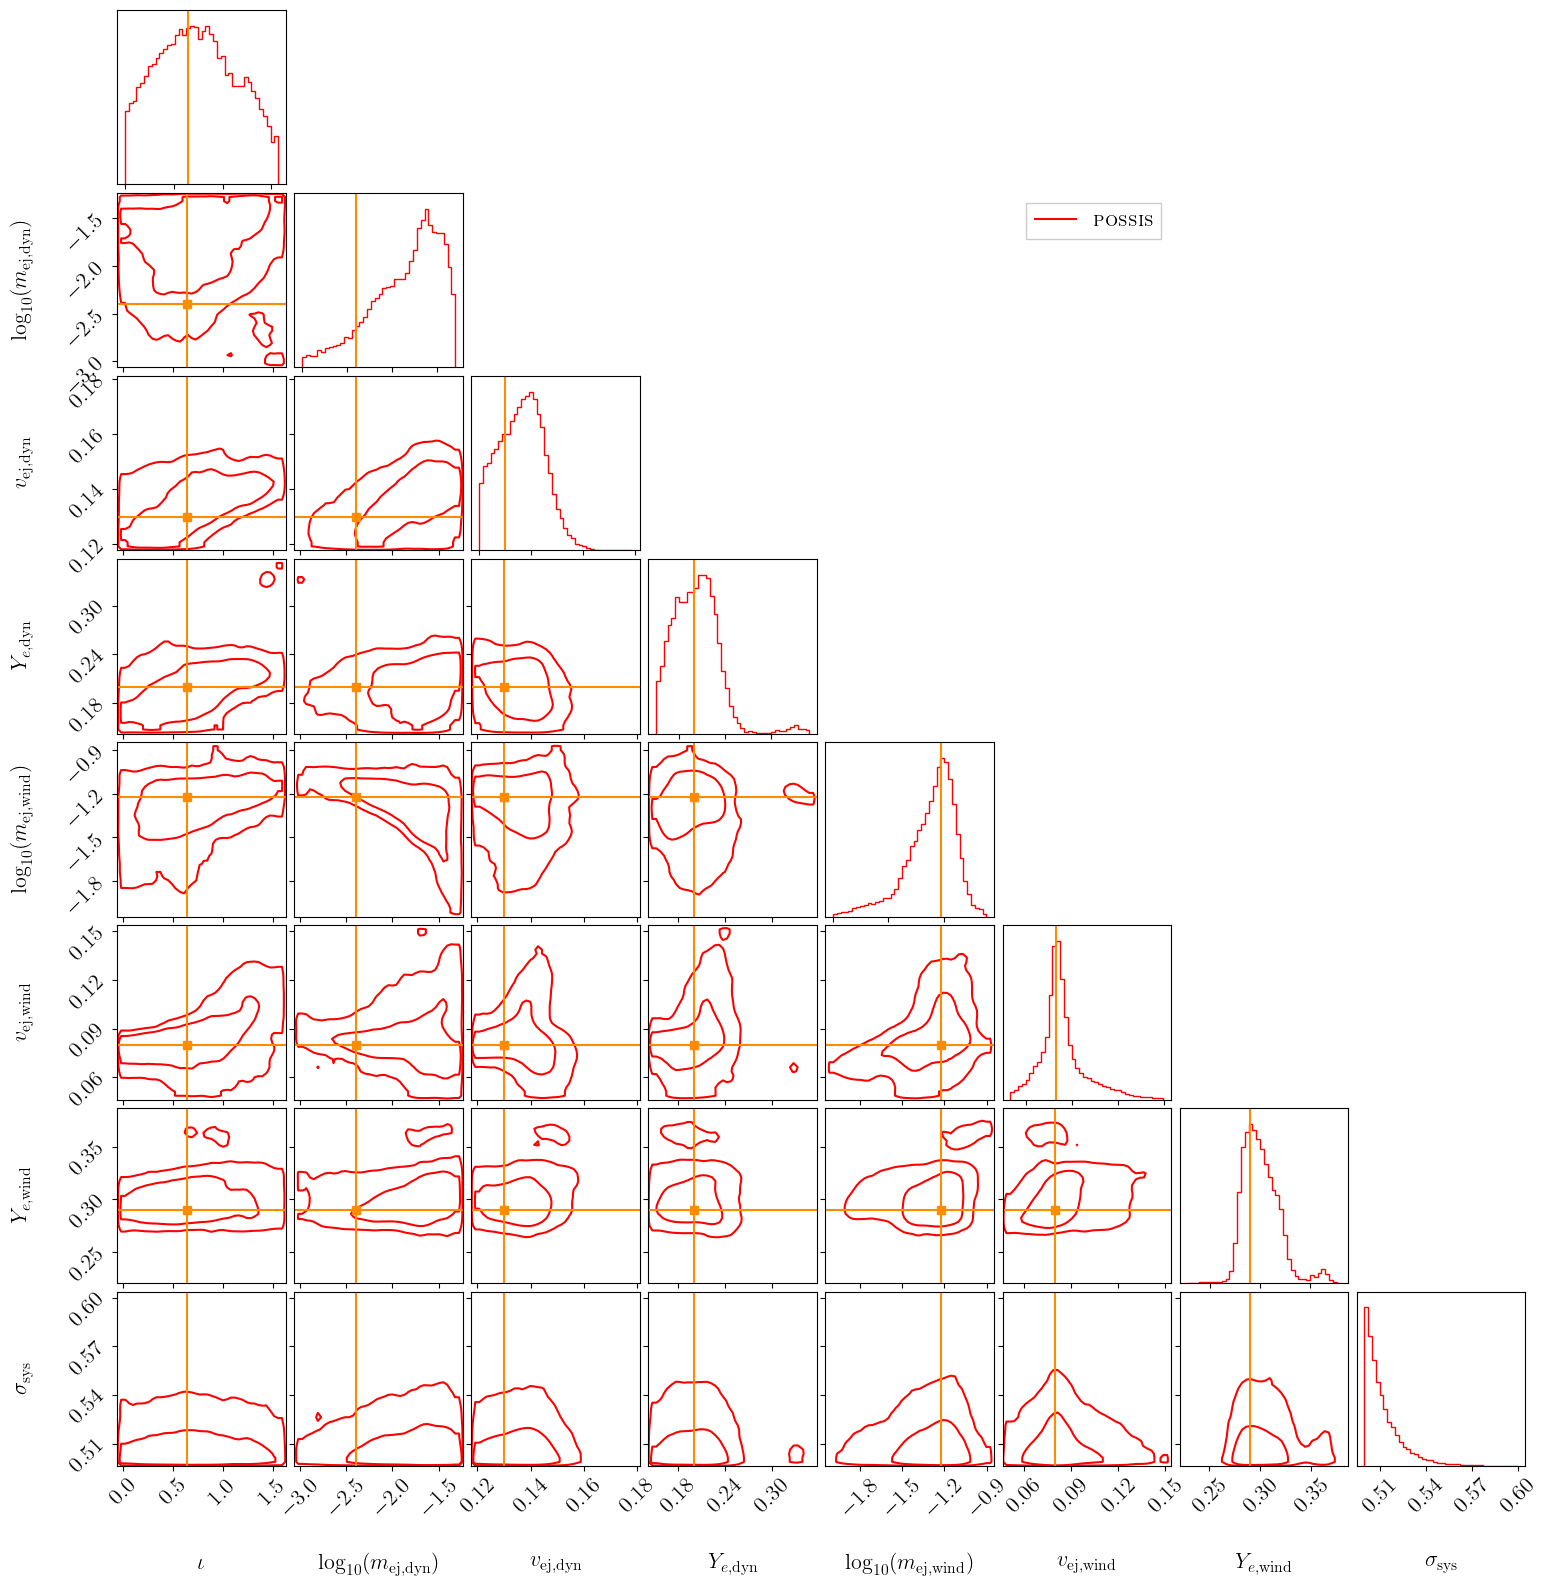

In [61]:
fig, ax = plt.subplots(8,8, figsize = (16, 16))

corner.corner(posterior_fiesta["chains"].reshape(-1,8), 
              truths = truths,
              fig=fig,
              color = "red",
              labelpad = 0.2,
              labels =  ["$\\iota$", "$\log_{10}(m_{\\mathrm{ej, dyn}})$", "$v_{\\mathrm{ej, dyn}}$", "$Y_{e, \\mathrm{dyn}}$", "$\log_{10}(m_{\\mathrm{ej, wind}})$", "$v_{\\mathrm{ej, wind}}$", "$Y_{e, \\mathrm{wind}}$", "$\\sigma_{\\mathrm{sys}}$"],
              **default_corner_kwargs,
              hist_kwargs=dict(density=True))

handles = []
for c in ["red"]:
    handle = plt.plot([],[], color=c)[0]
    handles.append(handle)

ax[1, 5].legend(handles=handles, labels=["\\textsc{possis}"], fontsize=15, fancybox=False, framealpha=1)
fig.subplots_adjust(left=0.08, bottom=0.08, right=0.96, top=0.99)
plt.show()

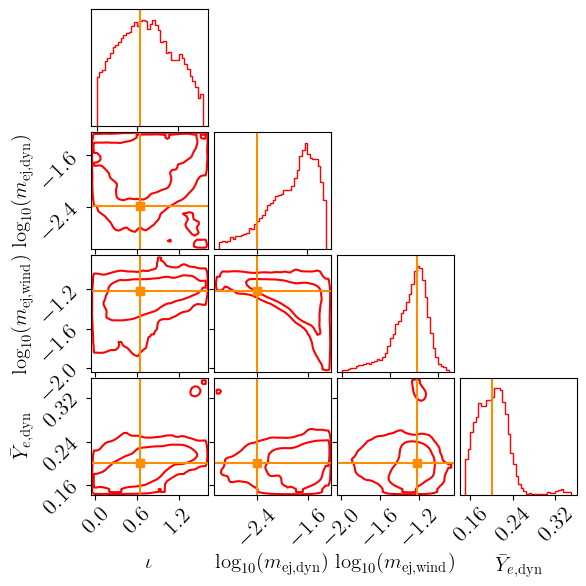

In [63]:
fig, ax = corner_plot(posterior_fiesta["chains"].reshape(-1, 8)[:, [0,1,4, 3]], parameter_names=[var_names[j] for j in [0,1,4, 3]], truths=[truths[j] for j in [0,1,4, 3]], color="red")

handles = []
for c in ["purple"]:
    handle = plt.plot([],[], color=c)[0]
    handles.append(handle)

for cax in ax.flatten():
    cax.xaxis.label.set_fontsize(15)
    cax.yaxis.label.set_fontsize(15)

fig.subplots_adjust(bottom=0.15, left=0.15)
fig.savefig("./figures/injection_Bu2025.pdf", dpi=250)